# Getting Started

## Spin Weighted Spherical Harmonics

The spin weighted spherical harmonic ${}_s Y_{lm}(\theta)e^{im\phi}$ can be computed using the [sphericalY()](spheroidal.spherical.sphericalY) function. The spin weight $s$ can be any integer or half-integer value. For a given spin weight, the values of $l$ and $m$ must satisfy $l \geq |s|$, $l-s \in \mathbb{Z}$ and $m \in \{-l, -l+1,\dots,l-1,l\}$. Note that the `spheroidal` library uses the convention that $\theta$ is the polar angle and $\phi$ is the azimuthal angle. For more information on spin weighted spherical harmonics, see the [Background](Background) page.

In [7]:
import spheroidal
from math import pi

s, l, m = -2, 2, 2

Y = spheroidal.sphericalY(s,l,m)

# Evaluate the harmonic at theta = pi/2, phi = 0
Y(pi/2, 0)

(0.15769578262626005+0j)

The [sphericalY_deriv()](spheroidal.spherical.sphericalY_deriv) and [sphericalY_deriv2()](spheroidal.spherical.sphericalY_deriv2) functions can be used to compute the first and second derivative of ${}_s Y_{lm}(\theta)e^{im\phi}$ with respect to $\theta$. 

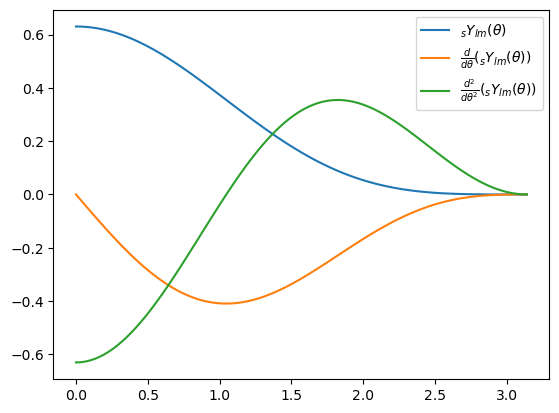

In [6]:

import matplotlib.pyplot as plt
import numpy as np

dY = spheroidal.sphericalY_deriv(s,l,m)
d2Y = spheroidal.sphericalY_deriv2(s,l,m)

# Plot as a function of theta at phi=0
theta = np.linspace(0,pi,100)
plt.plot(theta, Y(theta,0))
plt.plot(theta, dY(theta,0))
plt.plot(theta, d2Y(theta,0))
plt.legend([r"${}_sY_{lm}(\theta)$",
            r'$\frac{d}{d\theta}\left({}_sY_{lm}(\theta)\right)$',
            r'$\frac{d^2}{d\theta^2}\left({}_sY_{lm}(\theta)\right)$'])

plt.show()

## Spheroidal Eigenvalues

Use the [eigenvalue()](spheroidal.wrapper.eigenvalue) function to compute the spheroidal eigenvalue ${}_s \lambda_{lm}$ as defined in the equation below. 

\begin{equation}
\small
\left[\frac{1}{\sin \theta} \frac{d}{d \theta}\left(\sin \theta \frac{d}{d \theta}\right)-\gamma^2 \sin ^2 \theta-\frac{(m+s \cos \theta)^2}{\sin ^2 \theta}-2 \gamma s \cos \theta+s+2m\gamma + { }_s \lambda_{l m}\right]{ }_s S_{l m}^\gamma(\theta)=0
\end{equation}

The spheroidicity $\gamma$ can be any complex value. It is represented by the variable `g` in the `spheroidal` library.

In [8]:
s, l, m, g = -2, 2, 2, 1.5
spheroidal.eigenvalue(s,l,m,g)

-5.577627364678826

The `method` argument can be set to either `"spectral"` or `"leaver"` to specify how the eigenvalue should be computed. If `method` is set to `"spectral"`, the eigenvalue will be computed using the spherical expansion method. If it is set to `"leaver"`, then Leaver's method will be used instead. Both methods are described in detail on the [Background](Background) page. By default, the spherical expansion method is used because Leaver's method becomes unreliable at high values of $l$ unless a higher precision is used.

In [9]:
spheroidal.eigenvalue(s,l,m,g,method="leaver")

-5.5776273646788255

## Spin Weighted Spheroidal Harmonics

The [harmonic()](spheroidal.wrapper.harmonic) function returns the spin weighted spheroidal harmonic ${}_s S_{lm}^\gamma(\theta)e^{im\phi}$, where ${}_s S_{lm}^\gamma(\theta)$ is a solution to equation (1).

In [11]:
# compute spheroidal harmonic
S = spheroidal.harmonic(s,l,m,g)

# evaluate at theta=pi/2, phi=0
S(pi/2,0)

(0.06692950919170593+0j)

As with spheroidal eigenvalues, the `method` argument is set to `"spectral"` by default, but can be changed to `"leaver"`.

In [12]:
spheroidal.harmonic(s,l,m,g,method="leaver")(pi/2,0)

(0.06692950919170597+0j)

## Derivatives

The [harmonic_deriv()](spheroidal.wrapper.harmonic_deriv) function can be used to compute derivatives of spin weighted spheroidal harmonic. By default, this function returns the first derivative with respect to $\theta$ of ${}_s S_{lm}^\gamma(\theta)e^{im\phi}$ computed using the spherical expansion method.

In [13]:
spheroidal.harmonic_deriv(s,l,m,g)(pi/2,0)

(-0.20852146386265386+0j)

Use `n_theta` and `n_phi` to set the number of derivatives with respect to $\theta$ and $\phi$. Currently, only the first two derivatives with respect to $\theta$ are supported.

In [14]:
spheroidal.harmonic_deriv(s,l,m,g,n_theta=1,n_phi=1)(pi/2,0)

(-0-0.4170429277253077j)

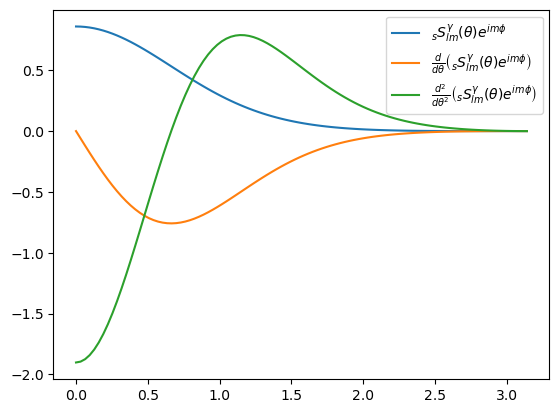

In [8]:
import spheroidal
import numpy as np
import matplotlib.pyplot as plt
from math import pi
s, l, m, g = -2, 2, 2, 1.5

theta = np.linspace(0,pi,100)

S0 = spheroidal.harmonic_deriv(s,l,m,g,n_theta=0)
S1 = spheroidal.harmonic_deriv(s,l,m,g,n_theta=1)
S2 = spheroidal.harmonic_deriv(s,l,m,g,n_theta=2)

plt.plot(theta, S0(theta,0))
plt.plot(theta, S1(theta,0))
plt.plot(theta, S2(theta,0))
plt.legend([r"${}_sS_{lm}^\gamma(\theta)e^{im\phi}$",
            r"$\frac{d}{d\theta}\left({}_sS_{lm}^\gamma(\theta)e^{im\phi}\right)$",
            r"$\frac{d^2}{d\theta^2}\left({}_sS_{lm}^\gamma(\theta)e^{im\phi}\right)$"])

plt.show()